In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


📉 Kalman Filter MSE: 0.02152
📉 Kalman Filter MAE: 0.12438


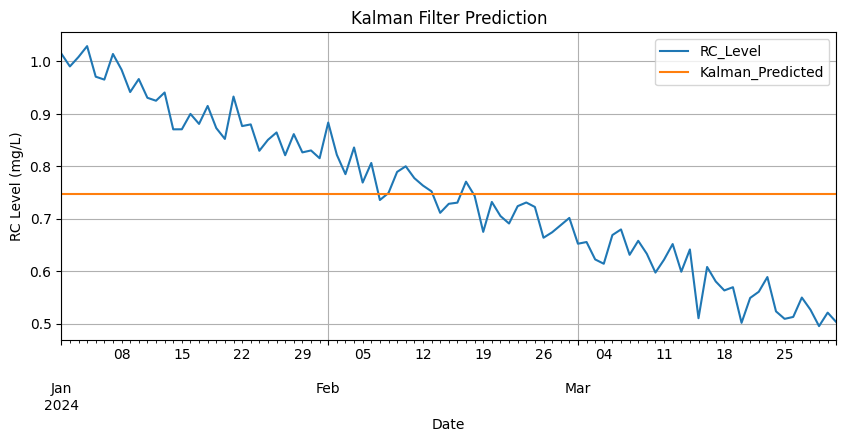

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the sample RC time series dataset
df = pd.read_csv("/content/drive/MyDrive/rcdc/rc_time_series.csv", parse_dates=['Time'])
df.set_index('Time', inplace=True)

# Apply Kalman Filter using SARIMAX with no ARIMA terms (acts like a Kalman filter)
model = SARIMAX(df['RC_Level'], order=(0, 0, 0), trend='c')  # c = constant trend
results = model.fit(disp=False)

# Predict using the filtered values (in-sample)
df['Kalman_Predicted'] = results.fittedvalues

# Evaluate prediction
mse = mean_squared_error(df['RC_Level'], df['Kalman_Predicted'])
mae = mean_absolute_error(df['RC_Level'], df['Kalman_Predicted'])
print(f"📉 Kalman Filter MSE: {mse:.5f}")
print(f"📉 Kalman Filter MAE: {mae:.5f}")

# Plot actual vs Kalman Filter predictions
df[['RC_Level', 'Kalman_Predicted']].plot(title="Kalman Filter Prediction", figsize=(10, 4))
plt.ylabel("RC Level (mg/L)")
plt.xlabel("Date")
plt.grid(True)
plt.show()


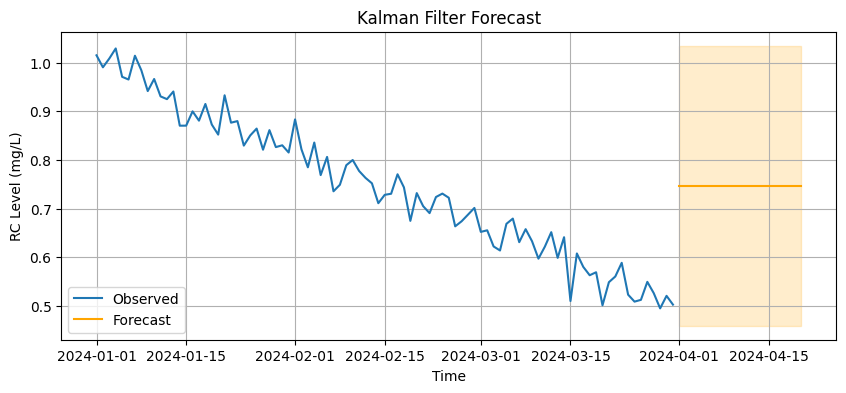

In [3]:
# Forecast next 20 time steps
n_forecast = 20
forecast = results.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot actual + forecast
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['RC_Level'], label='Observed')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='orange', alpha=0.2)
plt.title("Kalman Filter Forecast")
plt.ylabel("RC Level (mg/L)")
plt.xlabel("Time")
plt.legend()
plt.grid(True)
plt.show()
